Modul ini bertujuan untuk mempelajari visualisasi data dengan mengunakan seaborn. data yang diambil adalah data yang diperoleh dari keggele 

This module is aim to study data vizualization using seabporn. data used is received from keggel 

In [5]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


Melihat data dengan data.head()

In [6]:
data = pd.read_csv('supermarket_sales.csv')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Melihat informasi data (Missing value/yang lain). Non Null mengartikan data tidak ada missing value. dan 0 pada isnull 



In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [8]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [9]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


# 1. Sales For each branches vizualization 

In [10]:
Branch = data.Branch.value_counts().reset_index()
Branch

,index,Branch
0,A,340
1,B,332
2,C,328


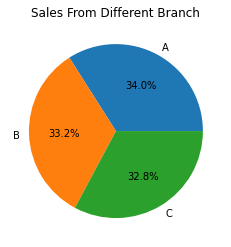

In [11]:
#Visualisasi data dengan Pie Chart 
#plt.pie(Branch.Branch, Labels = Branch['Index])
# plt : Lib, branch : data, labels : index)

plt.pie(Branch.Branch, labels = Branch['index'], autopct='%1.1f%%')
plt.title('Sales From Different Branch')
plt.show()

[Text(0.5, 1.0, 'Sales From Different Branch')]

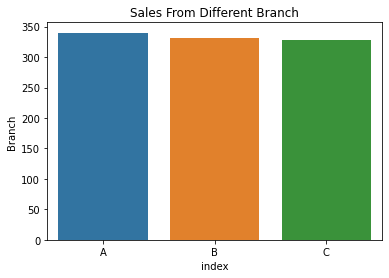

In [12]:
#Vertical Bar chart using Seaborn
# X adalah data index (A,B,C)
# Y adalah data Branch (Jumlah value)
# Set Title (menambahkan title untuk grafik yang di tampilkan) 

sns.barplot(x='index', y='Branch', data=Branch).set(title='Sales From Different Branch')

[Text(0.5, 1.0, 'Sales From Different Branch')]

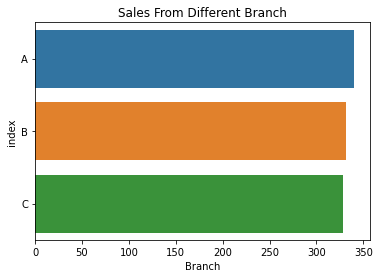

In [13]:
# Vertical Chart dapat dibuat dengan membalikan nilai X dan Y 

sns.barplot(x='Branch', y='index', data=Branch).set(title='Sales From Different Branch')

# 2. Sales for each Product Line 

In [14]:
# Menampilkan data product Line dan jumlah product line nya 
# Mensortir data dengan menampilkan product line dan group by 

product = data.groupby('Product line').size().to_frame(name = 'count').reset_index()
product

,Product line,count
0,Electronic accessories,170
1,Fashion accessories,178
2,Food and beverages,174
3,Health and beauty,152
4,Home and lifestyle,160
5,Sports and travel,166


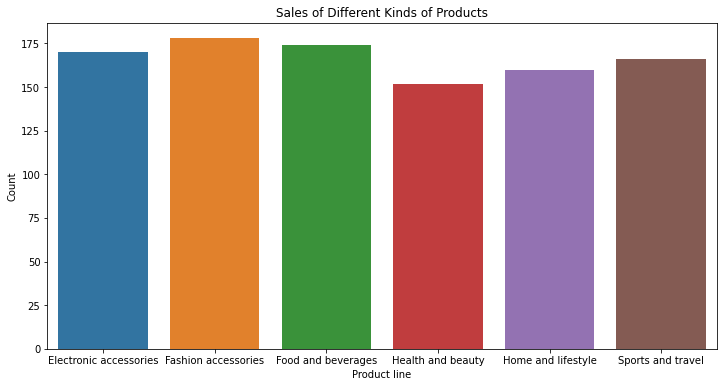

In [15]:
# Menampilkan visualisasi data 
#Bar Plot memerlukan data X dan Y 
plt.figure(figsize = (12,6))

sns.barplot(y='count', x='Product line', data = product)
plt.title("Sales of Different Kinds of Products")
plt.xlabel("Product line")
plt.ylabel("Count")

plt.show()

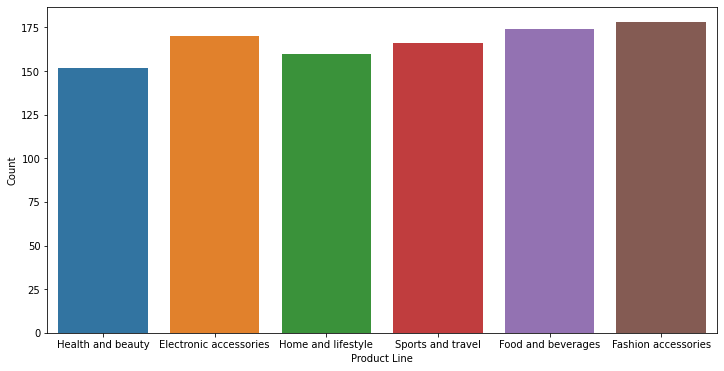

In [19]:
# Bar chart menggunakan CountPlot 
# Count Plot hanya perlu data X dan menghitung sendiri data Y 
plt.figure(figsize = (12,6))
sns.countplot(x='Product line', data = data)
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.show()

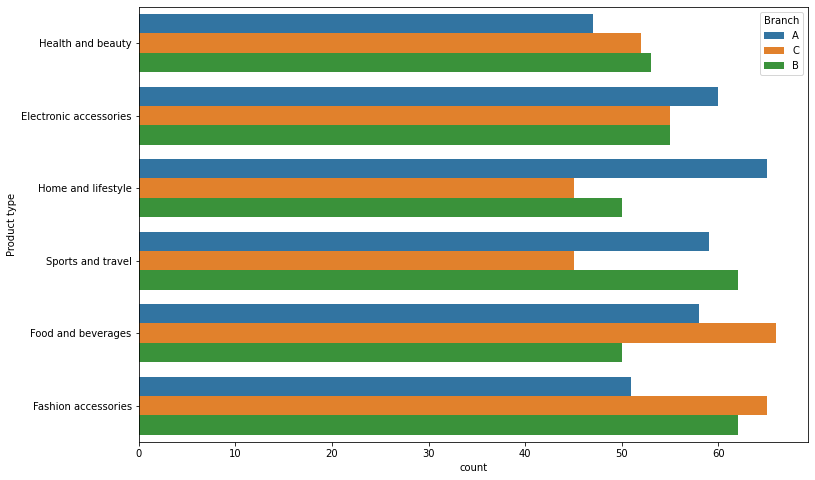

In [16]:
# Bar Chart menggunakan cpuntplot, perlu data x  
#Merubah axis 
#Hue : membreakdown tiap tiap line nya

plt.figure(figsize = (12,8))
sns.countplot(y ='Product line', hue = 'Branch', data = data)
plt.xlabel('count')
plt.ylabel('Product type')
plt.show()

# Gross Income in certain date range

melihat data gross income untuk rentang waktu tertentu 

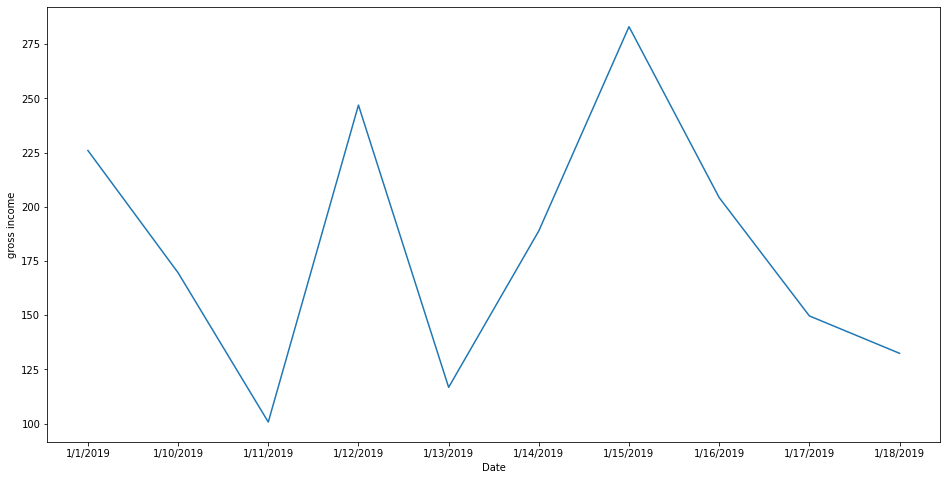

In [22]:
dates = data[['Date', 'gross income']].groupby('Date').sum()

plt.figure(figsize= (16,8))
sns.lineplot(data=dates[:10], x="Date", y="gross income")

# Is there any relationship between Rating dan Total Sales?

agar dapat mengetahui apakah ada hubungan antara rating dan total sales digunakan scatter plot untuk mengetahui ini. setelah di telusuri, tidak ada hubungan antara rating dan total sales melalui gambar

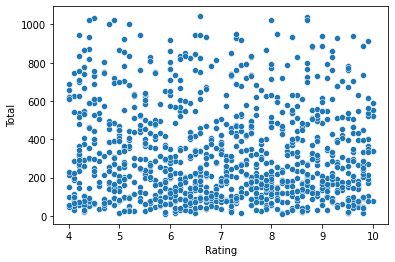

In [27]:
sns.scatterplot(data=data, x ="Rating", y="Total")